In [8]:
import numpy as np
from sklearn.decomposition import FastICA
import librosa
import matplotlib.pyplot as plt

In [25]:
# Import Sample data
temp, sr = librosa.load("samples/input.wav", mono=False)
mic_signal = temp[0, :] # mic signal
echo_signal = temp[2, :] # echo signal

- Visualize

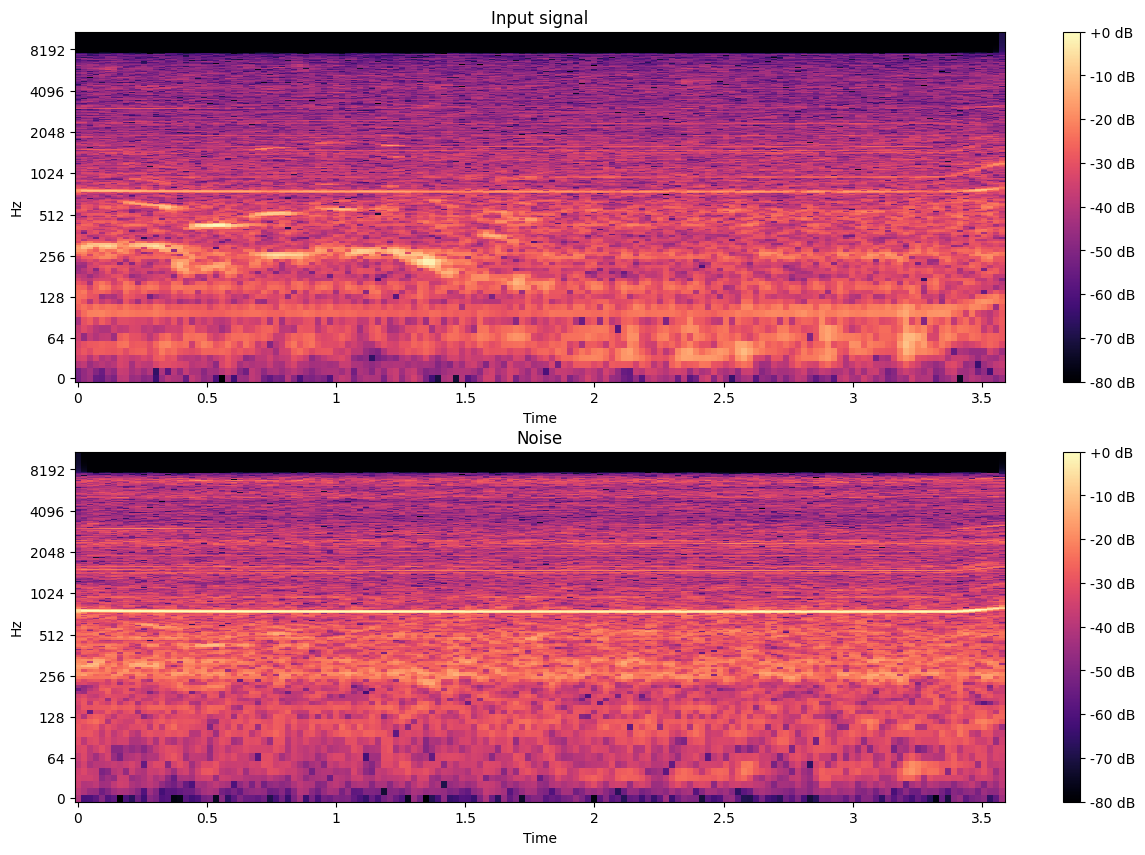

In [31]:
def show_spectrogram(input, noise):
    # Spectrogram
    D1 = librosa.amplitude_to_db(np.abs(librosa.stft(input)), ref=np.max)
    D2 = librosa.amplitude_to_db(np.abs(librosa.stft(noise)), ref=np.max)

    # Visualize
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 1, 1)
    librosa.display.specshow(D1, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Input signal')

    plt.subplot(2, 1, 2)
    librosa.display.specshow(D2, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Noise')

    plt.show()
show_spectrogram(mic_signal, echo_signal)

In [29]:
# Using ICA
ica = FastICA(n_components=2)
signals = np.c_[mic_signal, echo_signal]
separated_signals = ica.fit_transform(signals)

# Seperated signal
estimated_near_end = separated_signals[:, 0]
estimated_far_end = separated_signals[:, 1]

# ERLE
def compute_erle(d, e):
    return 10 * np.log10(np.var(d) / np.var(e))

erle = compute_erle(mic_signal, estimated_near_end)
print(f"ERLE: {erle} dB")

ERLE: -34.16846036911011 dB


- Visualize output

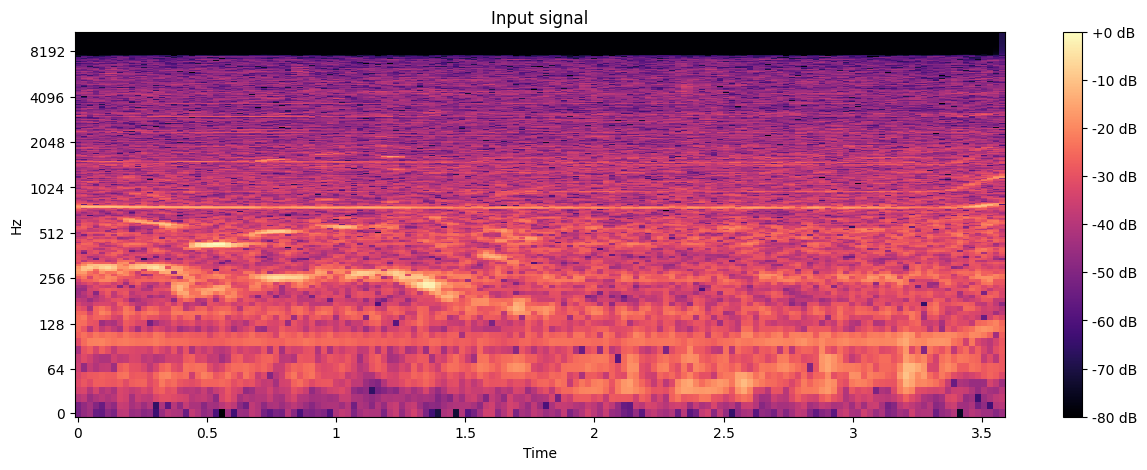

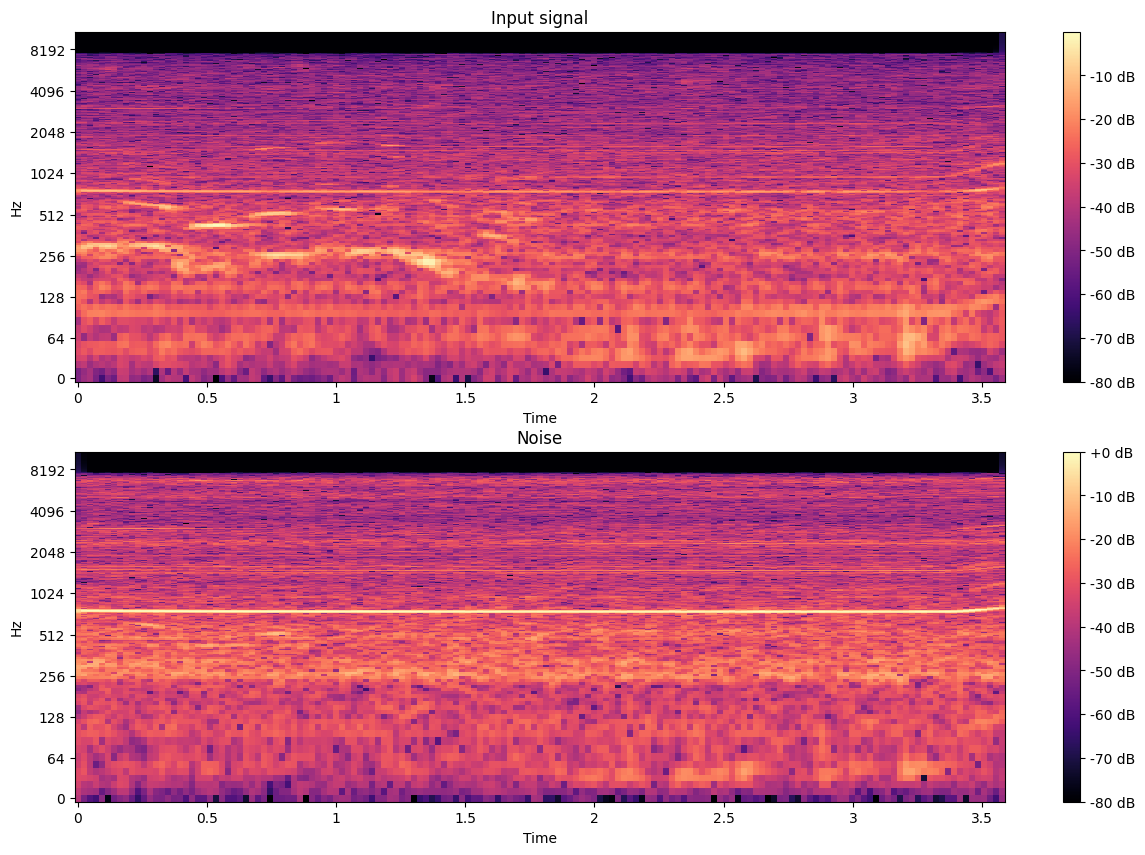

In [34]:
plt.figure(figsize=(15, 5))
 
librosa.display.specshow(
                        librosa.amplitude_to_db(np.abs(librosa.stft(mic_signal)), ref=np.max)
                        , sr=sr, x_axis='time', y_axis='log'
                        )
plt.colorbar(format='%+2.0f dB')
plt.title('Input signal')


show_spectrogram(estimated_near_end, estimated_far_end)


In [36]:
# Export result
import soundfile as sf

sf.write('output_signal.wav', estimated_near_end, sr)
sf.write('output_noise.wav', estimated_far_end, sr)

# 결과 쒵이누